<a href="https://colab.research.google.com/github/ayan6943/Employee-Attrition-Prediction-with-Machine-Learning/blob/main/Employee_Attrition_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Employee Attrition Prediction with Machine Learning**
In this notebook, we’ll go through the **entire ML pipeline** to predict employee attrition.

**Steps Covered:**
- Data Cleaning & Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Training a **Random Forest Classifier**
- Model Evaluation & Interpretation

**Let’s get started! 🚀**

## **Step 1: Load Libraries & Data**

In [1]:

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Set plot style
sns.set_style("whitegrid")


## **Step 2: Load & Explore Dataset**

In [2]:

# Load dataset
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")


df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## **Step 3: Data Preprocessing**

In [10]:

# Dropping unnecessary columns (like employee IDs)
df.drop(columns=["EmployeeNumber", "Over18", "EmployeeCount","StandardHours"], inplace=True, errors='ignore')

# Encoding categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Fill missing values (if any)
df.fillna(df.median(), inplace=True)


## **Step 4: Exploratory Data Analysis (EDA)**

<ipython-input-11-182b96705d13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Attrition"], palette="pastel")


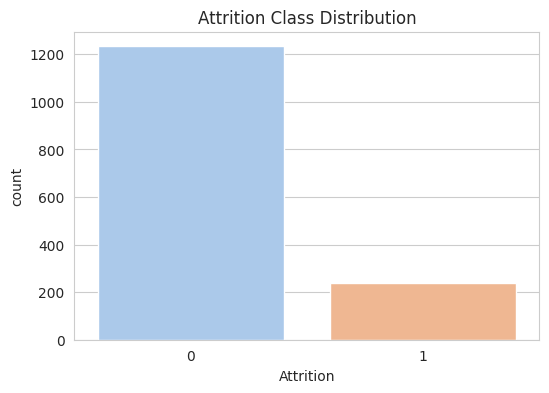

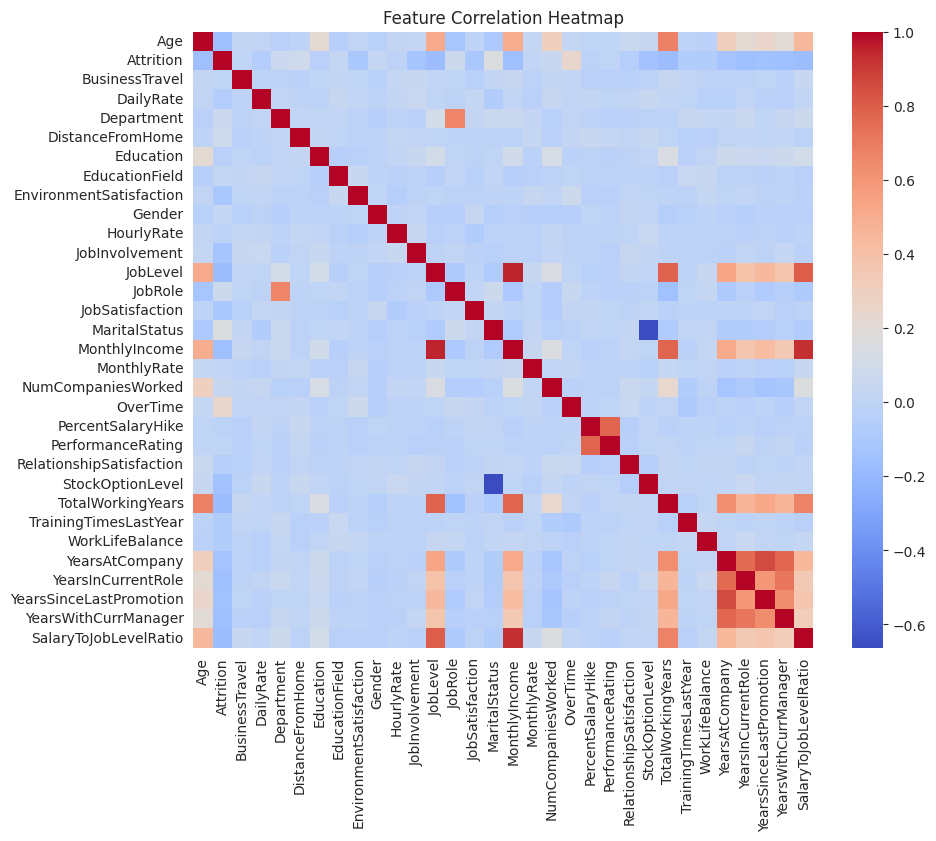

In [11]:

# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df["Attrition"], palette="pastel")
plt.title("Attrition Class Distribution")
plt.show()

# Correlation heatmap (to check relationships between variables)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


## **Step 5: Feature Engineering**

In [13]:

# Creating meaningful new features
df['YearsSinceLastPromotion'] = df['YearsAtCompany'] - df['YearsSinceLastPromotion']
df['SalaryToJobLevelRatio'] = df['MonthlyIncome'] / (df['JobLevel'] + 1)


## **Step 6: Train-Test Split & Resampling**

In [6]:

# Define target and features
y = df['Attrition']
X = df.drop(columns=['Attrition'])

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardizing numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## **Step 7: Train Random Forest Model**

In [14]:

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## **Step 8: Model Evaluation**

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       250
           1       0.93      0.87      0.90       244

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



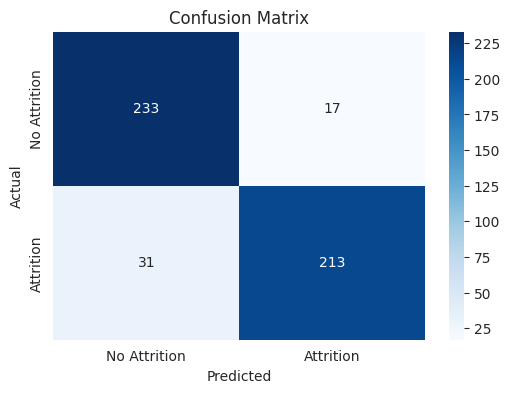

ROC AUC Score: 0.9024754098360656


In [15]:

# Predictions
y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


## **Final Thoughts & Next Steps**
In this project, we successfully built a Random Forest Classifier to predict employee attrition using the IBM HR Analytics dataset. The model achieved an accuracy of 90%, demonstrating its effectiveness in identifying employees who are likely to leave the company.

**Key Takeaways:**
*   Data preprocessing (handling categorical data, missing values,feature engineering) played a crucial role in improving model performance.
*   Addressing class imbalance with SMOTE helped the model generalize better.

With additional refinements, this model could be used for HR decision-making, helping organizations retain valuable employees.


**Hope this was helpful!**